<a href="https://colab.research.google.com/github/Pranjalits/Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



IMPORTING THE DATASET

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(housing.feature_names)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Prepare the data (current datatype : bunch ---> dataframe)

In [ ]:
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)


Target = Prices of the houses

In [ ]:
dataset['Prices'] = housing.target

For every record ---> target
{labelled data}

Statistical description of the data

In [ ]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


To check whether null value is there

In [ ]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Prices        0
dtype: int64

Exploratory Data Analysis

In [ ]:
 dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Prices,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


avgbedrooms and average rooms = high positive correlation

longitude and latitude = high negative

In [ ]:
sns.pairplot(dataset)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7992d58f89d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7992d576fbe0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=dataset, ax=ax)
plt.savefig('boxplot.png')

Population ---> huge range + outliers

others small range

any model on such data ---> bias towards population

NORMALISATION OF ALL FEATURES

In [ ]:
#SPLITTING THE DATA
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

#TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#NORMALISATION OF THE GIVEN DATA POINTS
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


MODEL TRAINING

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train_norm, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [ ]:
print(regressor.intercept_)

2.0692396089424165


MODEL PREDICTIONS

In [ ]:
regressor_pred = regressor.predict(X_test_norm)
regressor_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [ ]:
#calculating residuals
residuals = y_test - regressor_pred
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Prices, Length: 6192, dtype: float64

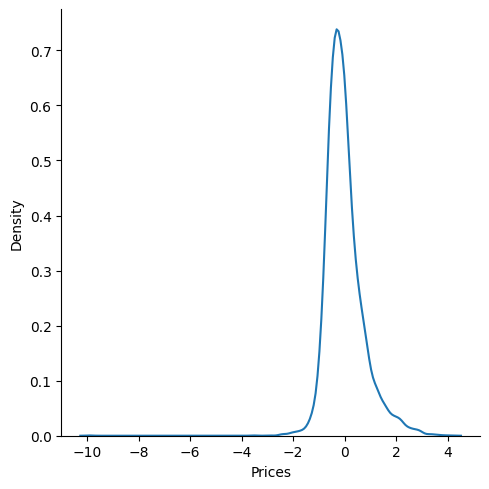

In [ ]:
#distribtion plot of residuals
sns.displot(residuals, kind = "kde")

MODEL PERFORMANCE

In [ ]:
#lower error value and R2 should be high
print(mean_absolute_error(y_test, regressor_pred))
print(mean_squared_error(y_test, regressor_pred))
print(r2_score(y_test, regressor_pred))
print(np.sqrt(mean_squared_error(y_test, regressor_pred)))

0.5272474538305955
0.5305677824766752
0.5957702326061664
0.7284008391515452


  SAVE THE MODEL ---> PICKLE FILE

In [ ]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))
#file contains coefficient and intercept

TO AVOID OVERFITTING

In [ ]:
from sklearn.linear_model import Lasso, Ridge
ridge_regression = Ridge(alpha = 1000000000000)
ridge_regression.fit(X_train_norm, y_train)

lasso_regression = Lasso(alpha = 0.001)
lasso_regression.fit(X_train_norm, y_train)

Lasso(alpha=0.001)

In [ ]:
lasso_predict = lasso_regression.predict(X_test_norm)
ridge_predict = ridge_regression.predict(X_test_norm)

In [ ]:
#lower error value and R2 should be high
print(mean_absolute_error(y_test,lasso_predict ))
print(mean_squared_error(y_test, lasso_predict))
print(r2_score(y_test, lasso_predict))
print(np.sqrt(mean_squared_error(y_test, lasso_predict)))

0.5273050861894018
0.5297443668521692
0.5963975777208825
0.7278353981857225


In [ ]:
print(mean_absolute_error(y_test,ridge_predict ))
print(mean_squared_error(y_test, ridge_predict))
print(r2_score(y_test, ridge_predict))
print(np.sqrt(mean_squared_error(y_test, ridge_predict)))

0.9062007423050263
1.3125452470491983
-3.915488223427133e-06
1.145663671000001
